## LAPTOP PRICE PREDICTION PROJECT (REGRESSION)

<img src="dataset-cover.jpg"/>

### About Dataset

The dataset emulates laptop prices, capturing various features commonly associated with laptops and their corresponding simulated prices. The dataset encompasses key attributes such as:
  <ol>
        <li>Brand</li>
        <li>Processor</li>
        <li>Speed</li>
        <li>RAM size</li>
        <li>Storage</li>
        <li>Capacity</li>
        <li>Screen Size</li> 
        <li>Weight</li>
  </ol>


### Introduction

In this data analysis, we explore a dataset that captures various attributes related to laptop pricing. The dataset provides valuable insights into features commonly associated with laptops, including brand, processor speed, RAM size, storage capacity, screen size, weight, and the corresponding prices.

Understanding the factors influencing laptop prices is crucial for both consumers and industry stakeholders. Analyzing this dataset allows us to uncover patterns, relationships, and trends within the data, providing valuable information for pricing strategies, market trends, and consumer preferences.

Throughout this analysis, we will load the dataset, examine summary statistics to gain an overview of the data distribution, and visualize relationships between different features and laptop prices. The goal is to derive meaningful insights that can inform decision-making processes related to laptop pricing and market dynamics.

##### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
## setting the figure size
sns.set(rc={'figure.figsize': (8,8)})

Loading the Data

In [3]:
laptop_data = pd.read_csv('Laptop_price.csv')

Data Preprocessing

In [4]:
#displaying the first 5 rows in the dataset
laptop_data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [5]:
#displaying the last 5 rows in the dataset
laptop_data.tail()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459
999,Lenovo,1.711980,4,256,16.561498,3.440883,8807.696702


In [6]:
#displaying a random sample
laptop_data.sample()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
913,Dell,3.125503,16,256,14.337968,3.277993,10061.271823


Other Information

In [7]:
display(
    laptop_data.describe(),
    pd.DataFrame(
        {
            'Features': laptop_data.columns.values,
            'Data Types': [laptop_data[col].dtype for col in laptop_data.columns],
            'Null Values': [laptop_data[col].isna().sum() for col in laptop_data.columns],
            'Percentage of Null values': [(laptop_data[col].isna().sum()/ len(laptop_data)*100) for col in laptop_data.columns],
            'Duplicate Values': [laptop_data.duplicated().sum() for col in laptop_data.columns],
            'Number of Unique Values': laptop_data.nunique().sum(),
        }
    )
)

print('\n')
print('----------------------------------------------------------------------------------------------------')
print(f'Total Columns= {laptop_data.shape[1]}')
print(f'Total rows= {laptop_data.shape[0]}')
print(f"Total Columns that have missing values= {laptop_data.isnull().any().sum()} ")
print(f'Total Rows that having missing value= {laptop_data.isnull().sum().sum()}')
print(f'Total Percentage of Missing Values= {(laptop_data.isnull().sum().sum()/np.product(laptop_data.shape))* 100}')

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


,Features,Data Types,Null Values,Percentage of Null values,Duplicate Values,Number of Unique Values
0,Brand,object,0,0.0,0,4012
1,Processor_Speed,float64,0,0.0,0,4012
2,RAM_Size,int64,0,0.0,0,4012
3,Storage_Capacity,int64,0,0.0,0,4012
4,Screen_Size,float64,0,0.0,0,4012
5,Weight,float64,0,0.0,0,4012
6,Price,float64,0,0.0,0,4012




----------------------------------------------------------------------------------------------------
Total Columns= 7
Total rows= 1000
Total Columns that have missing values= 0 
Total Rows that having missing value= 0
Total Percentage of Missing Values= 0.0


### Data Visualization / Exploratory Data Analysis

Univariate Analysis

<b>1. Brand Distribution</b>
<p>To gain insights into the distribution of laptop brands in our dataset.</p>

In [8]:
brand_no = laptop_data['Brand'].value_counts()
brand_no

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

<b>Insights</b>
<p>
We can see th various laptop brands total counts with Dell having the highest number
</p>

<pre>
Visualisation
</pre>

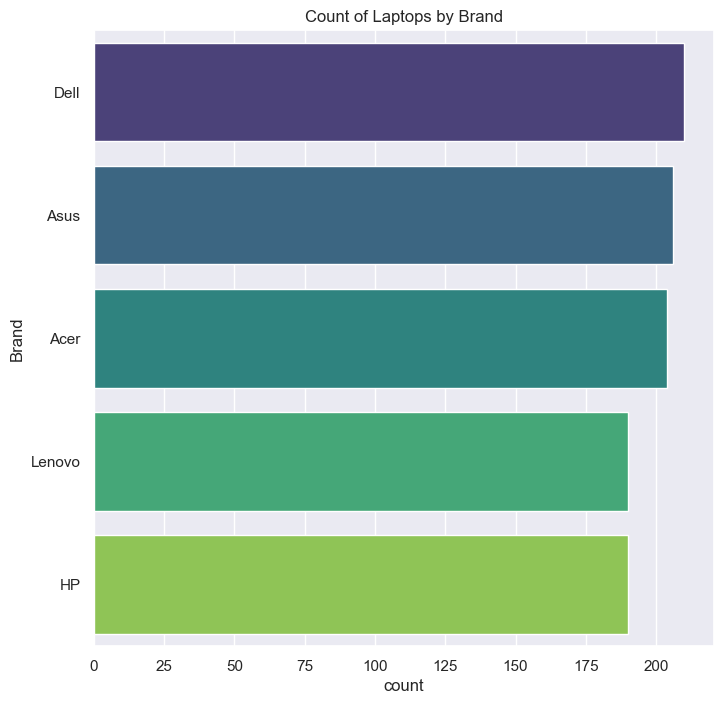

In [9]:
#setting the theme
sns.set_theme(style='darkgrid')
# Count plot
sns.countplot(y=laptop_data['Brand'], order=laptop_data['Brand'].value_counts().index, palette='viridis')
plt.title('Count of Laptops by Brand')
plt.show()

<b>2. Processor Speed Distribution</b>

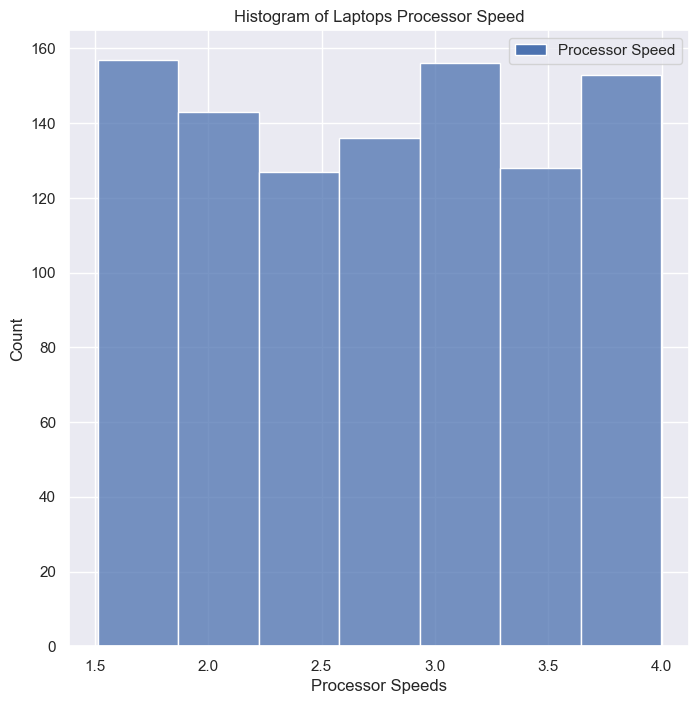

In [10]:
sns.histplot(x=laptop_data['Processor_Speed'], data=laptop_data, bins=7)
plt.title('Histogram of Laptops Processor Speed')
plt.legend(['Processor Speed'])
plt.xlabel('Processor Speeds')
plt.show()

<b>3. RAM Sizes</b>

In [11]:
#sorting in descending order
ram_count =laptop_data['RAM_Size'].value_counts().sort_values(ascending=False)

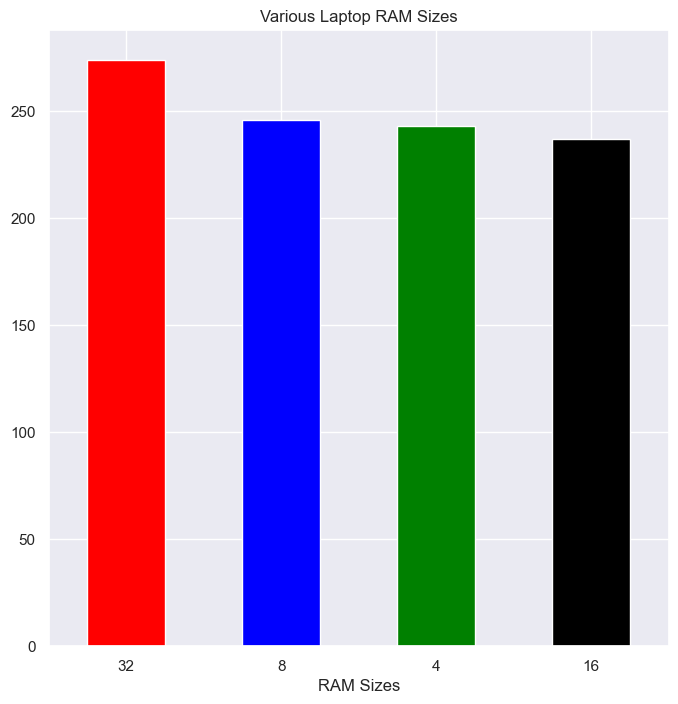

In [12]:
#displaying a bar chart
colors = ['red', 'blue', 'green', 'black']
labels = [32,8,4,16]
ram_count.plot(kind='bar', color=colors)
plt.title('Various Laptop RAM Sizes')
plt.xticks(rotation='horizontal')
plt.xlabel('RAM Sizes')
plt.show()

<b>4. Storage capacity<b>

In [13]:
storage_count= laptop_data['Storage_Capacity'].value_counts().sort_values(ascending=False)
storage_count

Storage_Capacity
256     357
1000    336
512     307
Name: count, dtype: int64

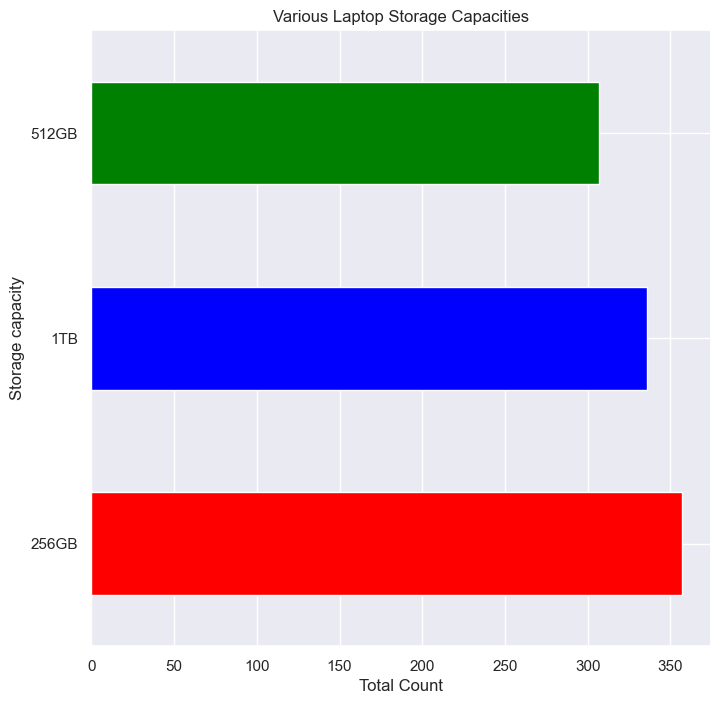

In [14]:
colors = ['red', 'blue', 'green']
storage_count.plot(kind='barh', color=colors)
plt.title('Various Laptop Storage Capacities')
plt.ylabel('Storage capacity')
plt.yticks([0,1,2],['256GB', '1TB', '512GB'])
plt.xlabel('Total Count')
plt.show()

<b>5. Screen Size</b>

In [15]:
laptop_data['Screen_Size']

0      11.185147
1      11.311372
2      11.853023
3      12.280360
4      14.990877
         ...    
995    12.587095
996    12.679356
997    12.666315
998    11.215581
999    16.561498
Name: Screen_Size, Length: 1000, dtype: float64

<pre>
Feature Engineering is needed
</pre>

In [16]:
bins = [0, 13, 15, float('inf')]
labels = ['Small', 'Medium', 'Large']
laptop_data['Screen_Size_Category'] = pd.cut(laptop_data['Screen_Size'], bins=bins, labels=labels)

In [17]:
screen_size =laptop_data['Screen_Size_Category'].value_counts()

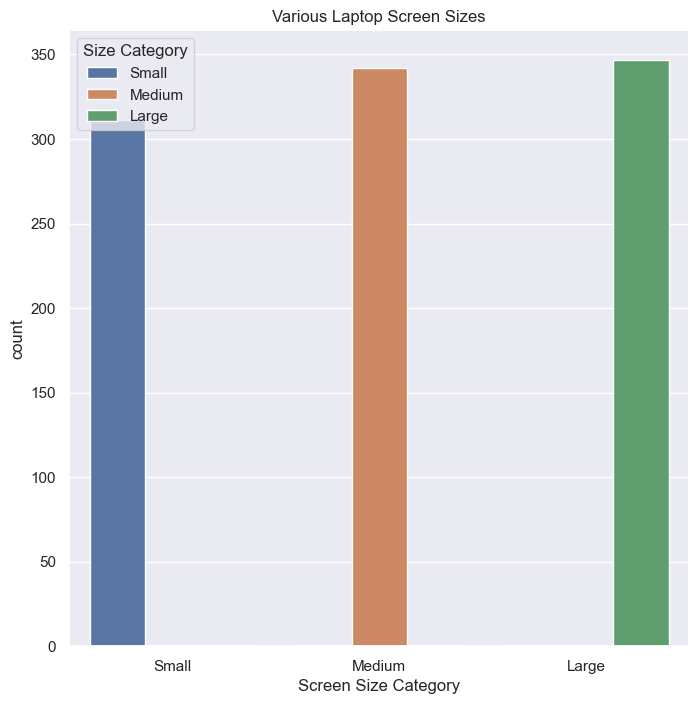

In [18]:
sns.countplot(x='Screen_Size_Category', data=laptop_data, hue='Screen_Size_Category')
plt.legend(title='Size Category', labels=['Small', 'Medium', 'Large'], loc='upper left')
plt.title('Various Laptop Screen Sizes')
plt.xlabel('Screen Size Category')
plt.show()

<b>6. Weight<b>

In [19]:
laptop_data['Weight'].sort_values(ascending=False)

132    4.990728
270    4.989697
362    4.986914
728    4.986422
234    4.984052
         ...   
961    2.011511
761    2.004931
117    2.004039
608    2.002788
304    2.000560
Name: Weight, Length: 1000, dtype: float64

<pre>
Feature Engineering is needed
</pre>

In [20]:
bins = [2,3,4, float('inf')]
labels = ['Light', 'Medium', 'Heavy']
laptop_data['Weight_Category']= pd.cut(laptop_data['Weight'], bins=bins, labels=labels)

In [21]:
laptop_data['Weight_Category'].value_counts().sort_values(ascending=False)

Weight_Category
Light     364
Heavy     319
Medium    317
Name: count, dtype: int64

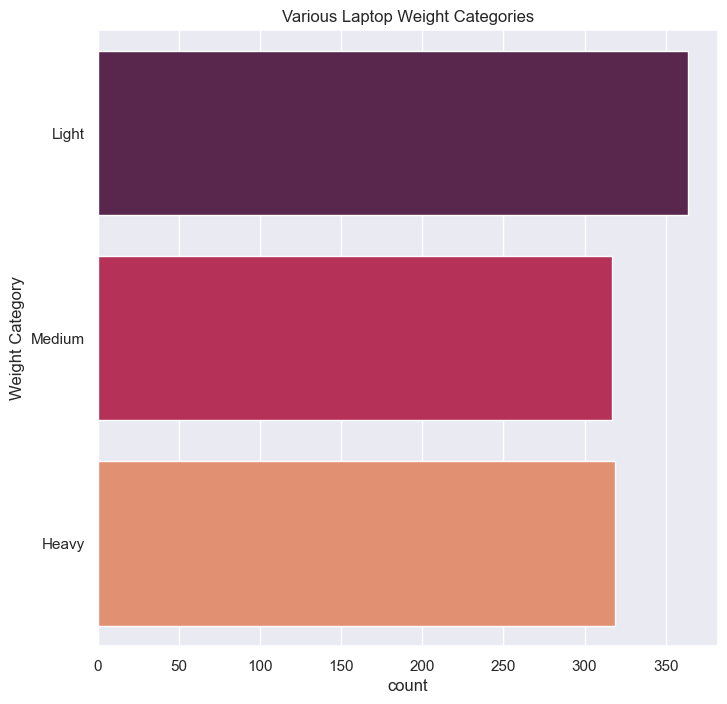

In [22]:
sns.countplot(y='Weight_Category', data=laptop_data, palette='rocket')
plt.ylabel('Weight Category')
plt.title('Various Laptop Weight Categories')
plt.show()

<b>7. Price<b>

C:\Users\Oluwuyi Olumide\AppData\Local\Temp\ipykernel_9452\3812119009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=laptop_data['Price'])


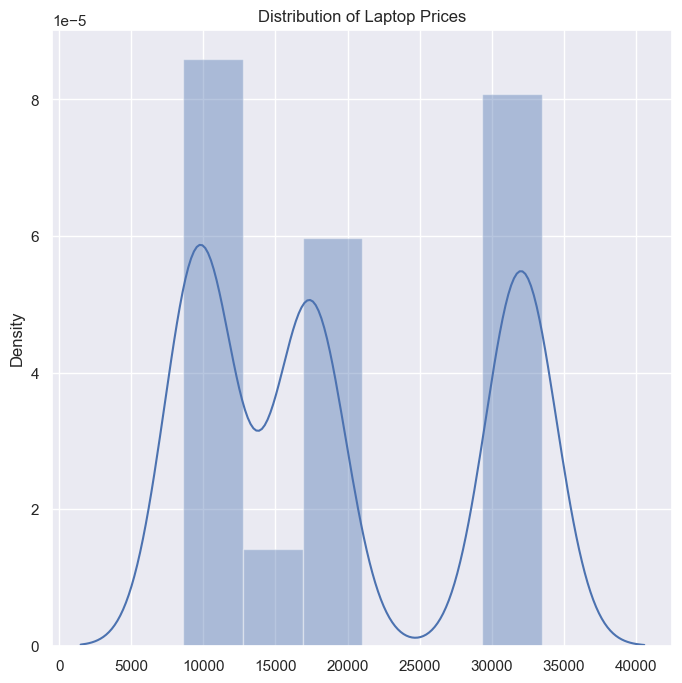

In [23]:
sns.distplot(x=laptop_data['Price'])
plt.title('Distribution of Laptop Prices')
plt.show()

Multivariate Analysis

In [24]:
laptop_data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Screen_Size_Category,Weight_Category
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065,Small,Light
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919,Small,Medium
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542,Small,Light
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334,Small,Heavy
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718,Medium,Heavy


<b>1. Brand and Price <b>

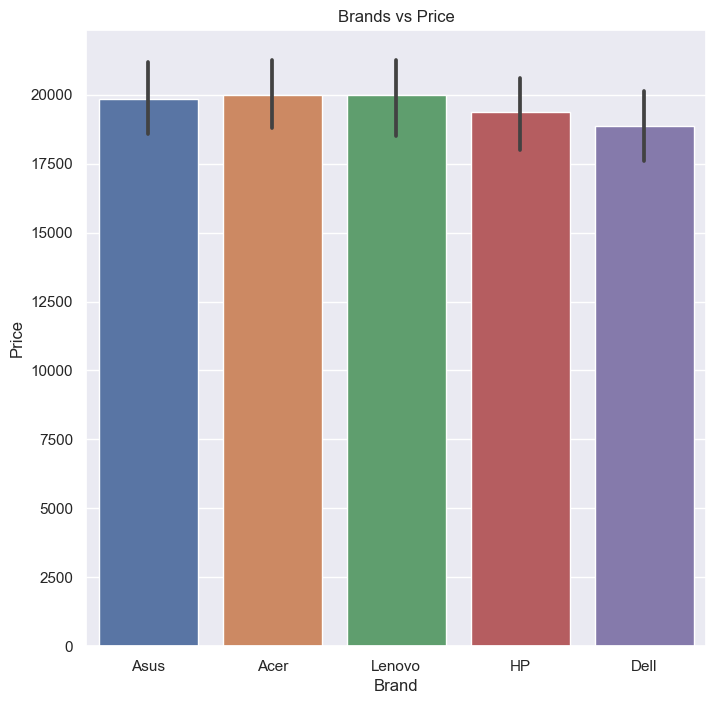

In [25]:
sns.barplot(x=laptop_data['Brand'], y=laptop_data['Price'], data=laptop_data)
plt.title('Brands vs Price')
plt.show()

<em>We can see that there is a close distribution of prices between Acer and Lenovo laptop brands having the highest</em>

<b>2. Processore Spped vs Price</b>

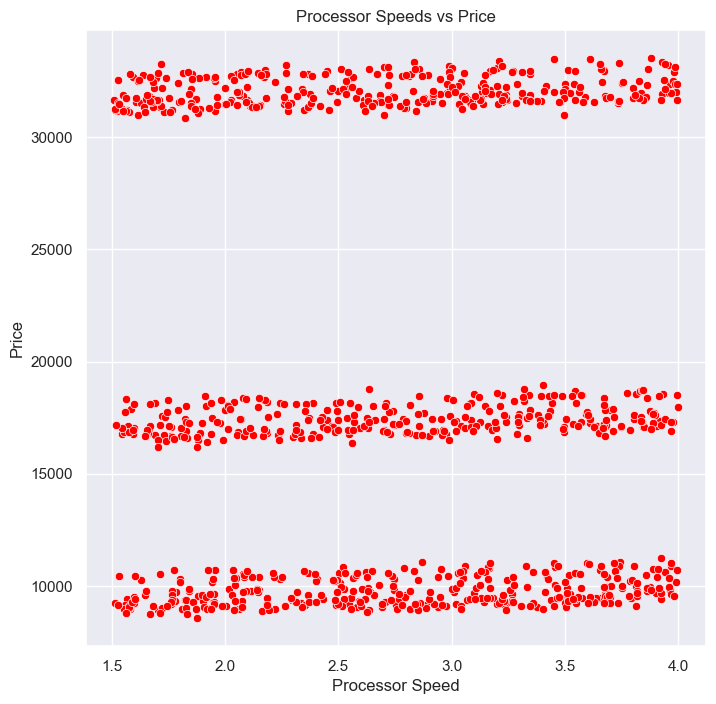

In [26]:
sns.scatterplot(x=laptop_data['Processor_Speed'], y=laptop_data['Price'], color='red')
plt.xlabel('Processor Speed')
plt.title('Processor Speeds vs Price')
plt.show()

<b>3. RAM Size vs Price</b>

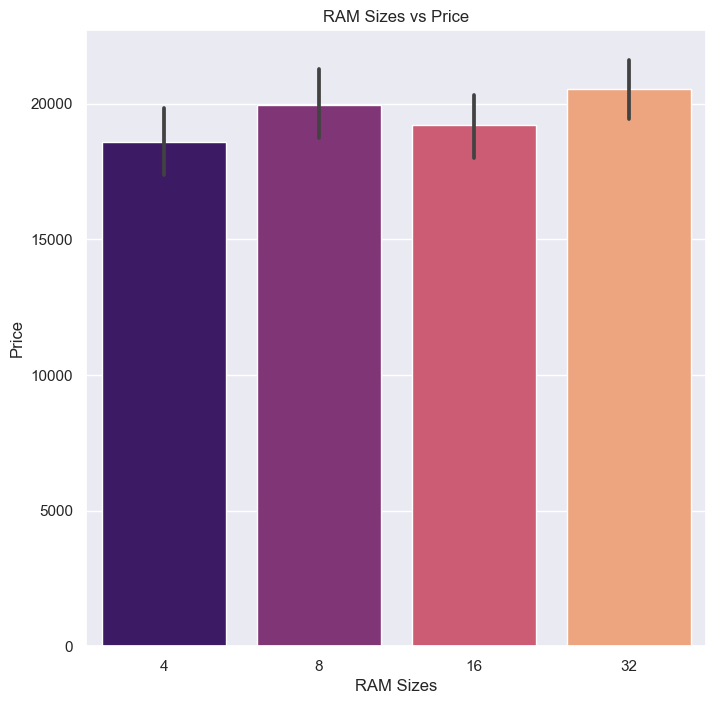

In [27]:
sns.barplot(x=laptop_data['RAM_Size'], y=laptop_data['Price'], palette='magma')
plt.title('RAM Sizes vs Price')
plt.xlabel('RAM Sizes')
plt.show()

<em>We can see that RAM sizes of 32 have the highest price</em>

<b>4. Screen Size vs Price</b>

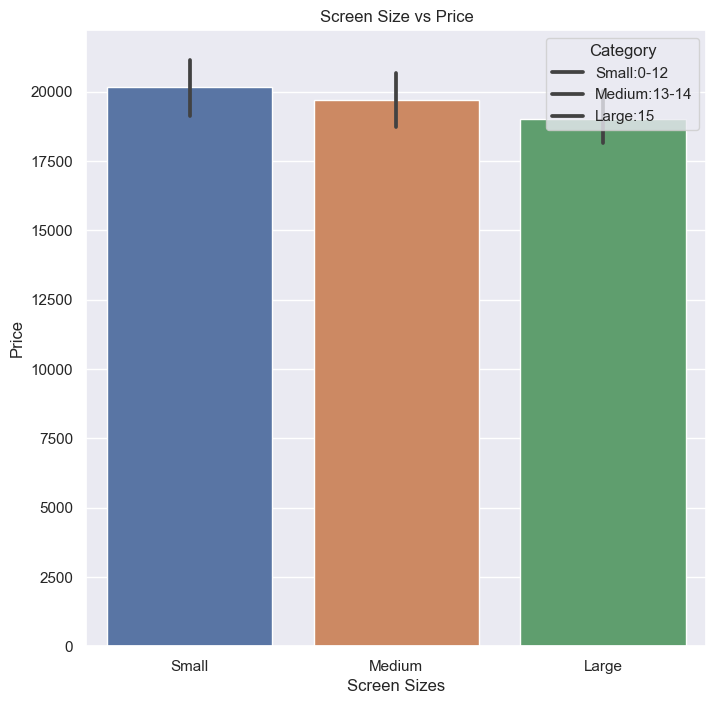

In [28]:
sns.barplot(x=laptop_data['Screen_Size_Category'], y=laptop_data['Price'])
plt.legend(title='Category', labels=['Small:0-12', 'Medium:13-14', 'Large:15'], loc='upper right')
plt.xlabel('Screen Sizes')
plt.title('Screen Size vs Price')
plt.show()

<em>We can see that Small screen sizes ( 0 to 12) for laptops are the most favourable</em>

<b>5. Storage Capacity vs Price</b>

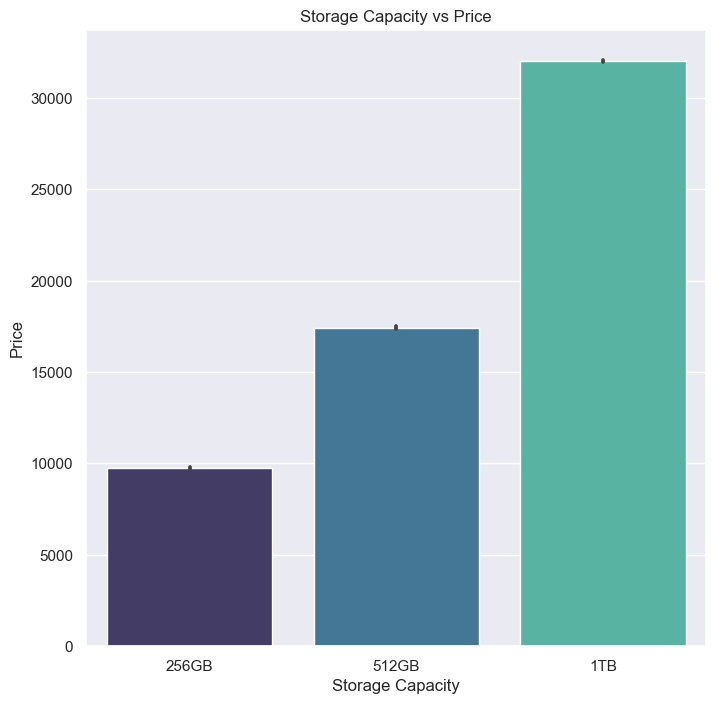

In [29]:
sns.barplot(x=laptop_data['Storage_Capacity'], y=laptop_data['Price'], palette='mako')
plt.xticks([0,1,2], ['256GB', '512GB', '1TB'])
plt.title('Storage Capacity vs Price')
plt.xlabel('Storage Capacity')
plt.show()

<em>
We can see that laptops with storage capacity of 1TB are preferred
</em>

<b>6. Weight Category vs Price</b>

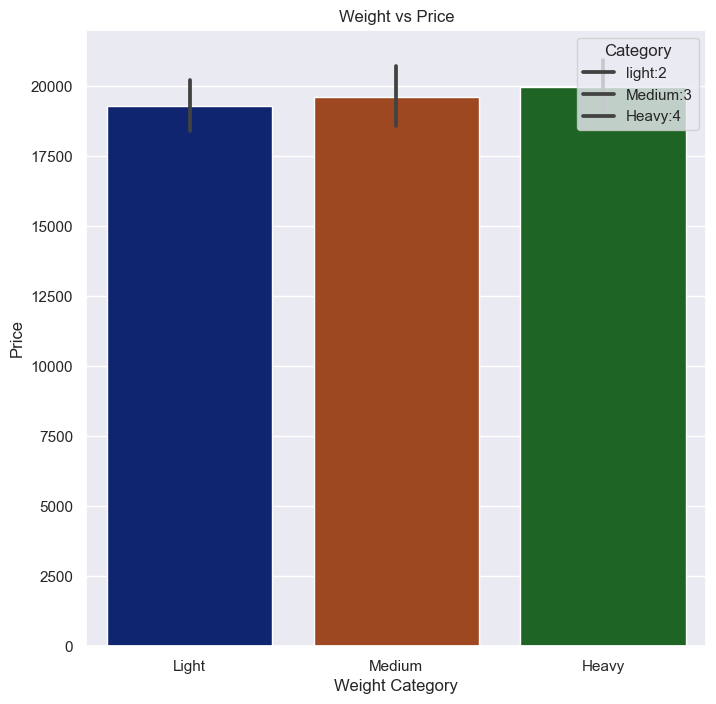

In [30]:
sns.barplot(x=laptop_data['Weight_Category'], y=laptop_data['Price'], palette='dark')
plt.xlabel('Weight Category')
plt.legend(title='Category', labels=['light:2', 'Medium:3', 'Heavy:4'], loc='upper right')
plt.title('Weight vs Price')
plt.show()

<b>7. Correlation Matrix</b>

In [31]:
numerical_cols = laptop_data.select_dtypes(['int', 'float'])
numerical_cols

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,3.830296,16,512,11.185147,2.641094,17395.093065
1,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3.241627,4,256,11.853023,2.029061,9291.023542
3,3.806248,16,512,12.280360,4.573865,17436.728334
4,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,31593.668017
996,2.780555,8,256,12.679356,3.750265,9149.521832
997,3.200569,4,512,12.666315,3.392612,16552.404779
998,1.604182,8,256,11.215581,3.857613,9407.473459


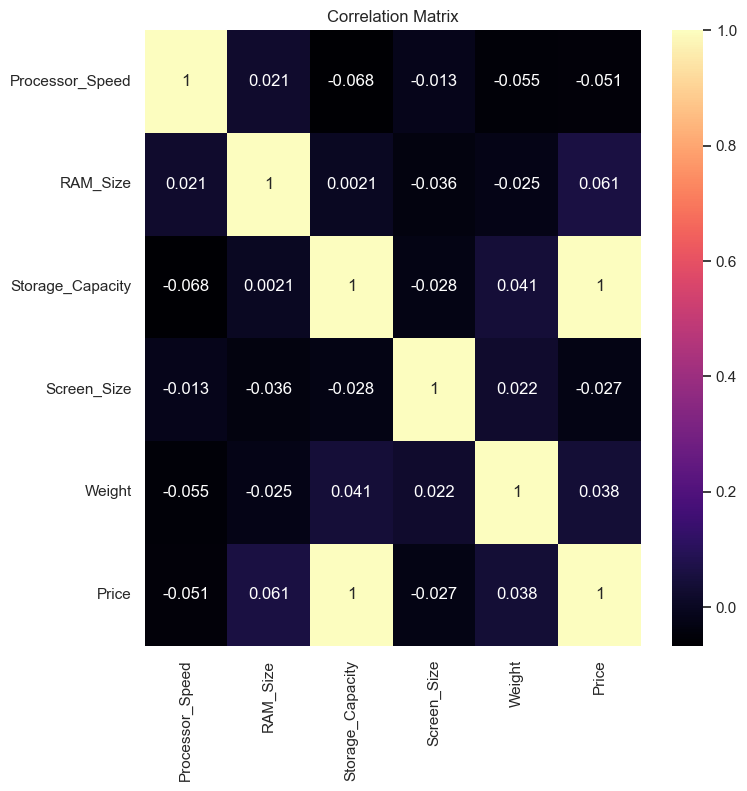

In [32]:
laptop_data_corr = ['Processor_Speed', 'RAM_Size','Storage_Capacity','Price']

sns.heatmap(numerical_cols.corr(), annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

In [33]:
#dropping unnecessary columns
laptop_data.drop(columns=['Weight', 'Screen_Size'], inplace=True)

In [34]:
laptop_data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Price,Screen_Size_Category,Weight_Category
0,Asus,3.830296,16,512,17395.093065,Small,Light
1,Acer,2.912833,4,1000,31607.605919,Small,Medium
2,Lenovo,3.241627,4,256,9291.023542,Small,Light
3,Acer,3.806248,16,512,17436.728334,Small,Heavy
4,Acer,3.268097,32,1000,32917.990718,Medium,Heavy


Mapping Categorical Columns Data

In [35]:
laptop_map = {
    'Dell':1,
    'Asus':2,
    'Acer':3,
    'Lenovo':4,
    'HP':5
}
laptop_data['Brand']= laptop_data["Brand"].map(laptop_map)


In [36]:
screen_map = {
    'Small':1,
    'Medium':2,
    'Large':3,
}
laptop_data['Screen_Size_Category']= laptop_data['Screen_Size_Category'].map(screen_map)


In [37]:
weight_map = {
    'Light':1,
    'Medium':2,
    'Heavy':3,
}
laptop_data['Weight_Category']= laptop_data['Weight_Category'].map(weight_map)


Converting to the correct datatype

In [38]:
laptop_data['Weight_Category']= laptop_data['Weight_Category'].astype('int64')
laptop_data['Screen_Size_Category']= laptop_data['Screen_Size_Category'].astype('int64')

In [39]:
laptop_data.dtypes

Brand                     int64
Processor_Speed         float64
RAM_Size                  int64
Storage_Capacity          int64
Price                   float64
Screen_Size_Category      int64
Weight_Category           int64
dtype: object

Feature Selection

In [40]:
X = laptop_data.drop(columns=['Price'], axis=1)
X

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size_Category,Weight_Category
0,2,3.830296,16,512,1,1
1,3,2.912833,4,1000,1,2
2,4,3.241627,4,256,1,1
3,3,3.806248,16,512,1,3
4,3,3.268097,32,1000,2,3
...,...,...,...,...,...,...
995,5,3.343584,4,1000,1,2
996,1,2.780555,8,256,1,2
997,1,3.200569,4,512,1,2
998,2,1.604182,8,256,1,2


In [41]:
y= laptop_data['Price']
y

0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           ...     
995    31593.668017
996     9149.521832
997    16552.404779
998     9407.473459
999     8807.696702
Name: Price, Length: 1000, dtype: float64

Model Traning

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [43]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Ridge Regression', Ridge(alpha=1.0)),
]

Pipeline Preprocessing

In [44]:
# Create an empty list to store the results
results_list = []

# Looping through the models
for model_name, model in models:
    # Pipeline creation
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Fit the pipeline 
    pipe.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipe.predict(X_test)
    
    # Calculate Mean Squared Error (MSE), Mean Absolute Error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the results to the list
    results_list.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2})

# Convert the list of dictionaries to a DataFrame
result_df = pd.DataFrame(results_list)

# Display the result_df
result_df

,Model,MSE,MAE,R2
0,Linear Regression,31883.981033,144.918712,0.999649
1,Lasso Regression,31783.269065,144.688045,0.999650
2,Ridge Regression,31896.971521,145.173700,0.999649


<b>Mean Squared Error (MSE):</b>
<p>
The mean squared error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates better model performance, with smaller deviations between predicted and actual values.
</p>

<ul>
<li>
The MSE of approximately 31783.27 of the Lasso Regression model suggests that, on average, the squared difference between predicted and actual laptop prices is relatively small. This indicates a good level of accuracy in the model's predictions.
</li>
</ul>




<b>Mean Absolute Error (MAE):</b>
<p>
The mean absolute error (MAE) measures the average absolute difference between the predicted and actual values. It provides another measure of prediction accuracy.
</p>

<ul>
<li>
The MAE of approximately 144.69 indicates that, on average, the model's predictions deviate by approximately $144.69 from the true laptop prices. This further confirms the model's accuracy in predicting laptop prices.
</li>
</ul>




<b>R-squared (R2):</b>
<p>
The R-squared (R2) score measures the proportion of the variance in the target variable (laptop prices) that is explained by the features included in the model. A higher R-squared value indicates a better fit of the model to the data.
</p>

<ul>
<li>
With an R-squared score of approximately 0.9996, it suggests that approximately 99.96% of the variance in laptop prices is explained by the features included in the model. This indicates an excellent fit of the model to the data.
</li>
</ul>




<p>The Lasso Regression has the least MSE, MAE and R2 making it the preferred model</p>
<br>
The low MSE, RMSE, and MAE values suggest that the model's predictions are accurate, with small deviations from the true prices.

Model Evaluation

In [45]:
lasso_model = [model for name, model in models if name == 'Lasso Regression'][0]

# Create a pipeline for Lasso Regression
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', lasso_model)
])

lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())])

In [46]:
# Evaluating the traning set
train_score = lasso_pipe.score(X_train, y_train)
test_score = lasso_pipe.score(X_test, y_test)

print('Traning R-squared:',train_score)
print('Test R-squared:',test_score)

Traning R-squared: 0.9995419398853527
Test R-squared: 0.9996499507004629


<b>Training R-squared</b>

<p>The high training R-squared value of 0.9995 indicates that the Lasso Regression model explains approximately 99.95% of the variance in the traning data. This suggest an excellent fit of the model to the traning dataset</p>

<b>Testing R-squared</b>

<p>The high training R-squared value of 0.9996 that is approximately 99.96%, reflects the model's ability to generalize well to unseen data. With a high R-squared value on the test set, it indicates the model's performance extends beyond the traning data and maintains its predictive nature on newer instances</p>

In [47]:
y_pred = lasso_pipe.predict(X_test)
y_pred[:6]

array([10734.83932532, 31530.55701201,  9626.69943013,  9260.09017119,
       32016.27032048, 31623.24944239])

<b> Cross Validation</b>

In [48]:
cv_scores = cross_val_score(lasso_pipe, X_train,y_train, cv=5, scoring='r2')

#displaying the cross validation results

print('Cross-Validation R-squared scores:', cv_scores)
print('Mean Cross-Validation R-squared scores:', np.mean(cv_scores ))

Cross-Validation R-squared scores: [0.9994414  0.99939638 0.99954597 0.99963779 0.99957061]
Mean Cross-Validation R-squared scores: 0.9995184290843973


<b>Cross Validation R-squared Scores:</b>

<p>
    <ul>
       <li>The cross vaidation R-squared scoresranges from 0.9994 to 0.9996, indicating consistent high performance accross different folds</li>
    </ul>
</p>

<b>Mean Cross Validation R-quared:</b>
<p>
   <ul>
        <li>
        The mean cross vaidation R-squared score of approximately 0.9995 represents the average performance of the model across all.
        </li>
        <li>
        With such a high mean CV R-squared value, it is evident that the model effectively captures the underlying patterns in the data and maintains its predictive power across different subsets 
        </li>
   </ul>
</p>

<b>Conclusion</b>

<p>
The cross-validation results poses the robust and generalization ability of the model. The high R-squared scores across different folds, along with the mean CV R-squared value, indicate that the model performs well on unseen data and is not overfitting to the training dataset.
</p>

In [49]:
M_lasso = pd.DataFrame({
    'y_test': y_test,
    'y_pred':y_pred
})

M_lasso['Residual'] = y_pred - y_test
M_lasso.sort_values(by='Residual', ascending=False)

,y_test,y_pred,Residual
408,17768.373308,18252.046316,483.673008
365,30846.987761,31296.056385,449.068624
254,10405.951435,10805.575608,399.624172
425,8570.012950,8961.169793,391.156843
411,31641.105861,32016.270320,375.164460
...,...,...,...
101,11055.045240,10743.354838,-311.690402
261,10131.593324,9765.960402,-365.632922
589,17156.710715,16787.317111,-369.393604
656,18071.455946,17670.259320,-401.196626


Predictions

In [50]:
seen , unseen = train_test_split(laptop_data, random_state=42, test_size=0.2)
print(f"""
seen = {seen.shape}
unseen = {unseen.shape}""")


seen = (800, 7)
unseen = (200, 7)


In [51]:
# Unseen data test
unseen["Predicted_Price"] = lasso_pipe.predict(unseen.drop(columns={"Price"}))
unseen['Residual'] = unseen["Predicted_Price"] - unseen["Price"]
unseen.sort_values(by="Residual", ascending=False)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Price,Screen_Size_Category,Weight_Category,Predicted_Price,Residual
408,3,2.721608,32,512,17768.373308,2,2,18252.046316,483.673008
365,3,1.822175,4,1000,30846.987761,2,1,31296.056385,449.068624
254,1,3.686754,32,256,10405.951435,3,1,10805.575608,399.624172
425,5,1.877645,4,256,8570.012950,1,3,8961.169793,391.156843
411,5,2.614757,16,1000,31641.105861,1,3,32016.270320,375.164460
...,...,...,...,...,...,...,...,...,...
101,1,3.740840,32,256,11055.045240,1,1,10743.354838,-311.690402
261,4,2.504827,16,256,10131.593324,3,2,9765.960402,-365.632922
589,1,2.312975,4,512,17156.710715,3,3,16787.317111,-369.393604
656,1,3.672262,16,512,18071.455946,3,1,17670.259320,-401.196626


[Text(0.5, 1.0, 'Residual Distribution Plot')]

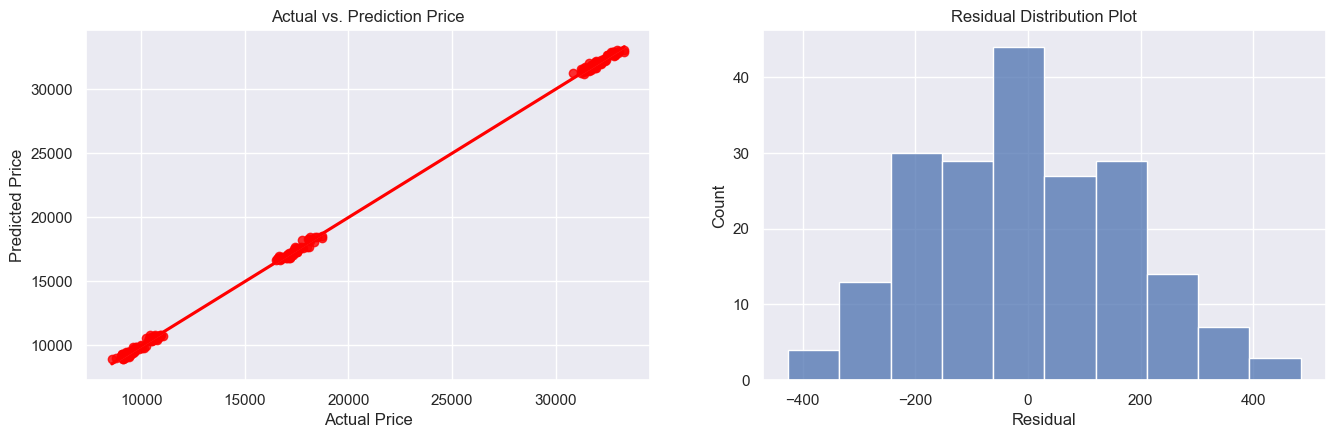

In [52]:
plt.figure(figsize=(16, 10))
plt.subplot(221)
sns.regplot(data=unseen, x='Price', y='Predicted_Price', color='red').set(title='Actual vs. Prediction Price', xlabel='Actual Price', ylabel='Predicted Price')

plt.subplot(222)
sns.histplot(unseen['Residual']).set(title='Residual Distribution Plot')

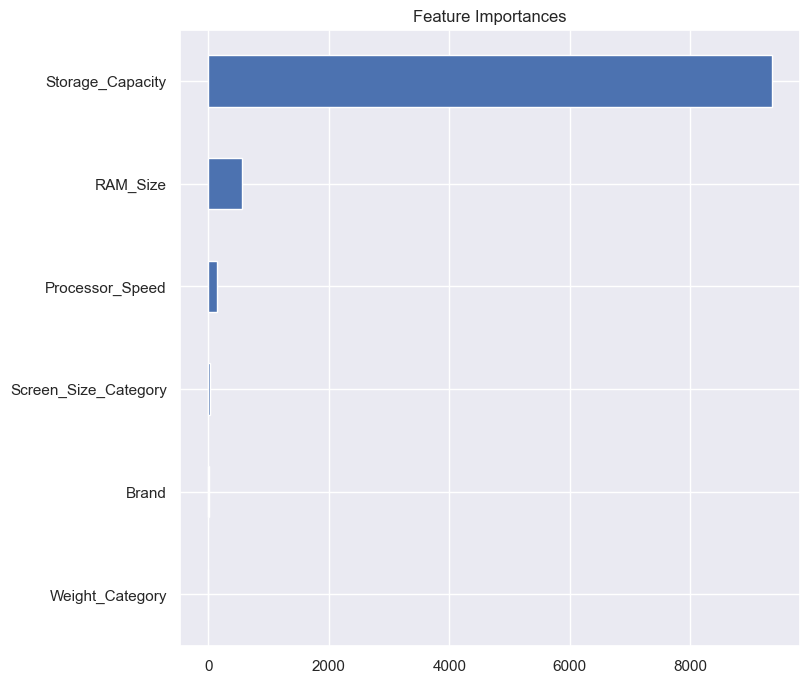

In [53]:
lasso_regression_model = lasso_pipe.named_steps['model']

# Get the coefficients
coefficients = lasso_regression_model.coef_
feature_imp = pd.Series(coefficients, index=X.columns).sort_values(ascending=True)
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()


Conclusion

Based on the modeling that has been conducted, Lasso regression analysis has been successfully performed using a machine learning approach, where the features 'Storage Capacity' becomes the most influential feature on 'Price'.

Saving the model

In [54]:
import joblib

saved_model = lasso_pipe
joblib.dump(lasso_pipe, 'lasso_model.joblib')

['lasso_model.joblib']

Saving the new csv file

In [54]:
laptop_data.to_csv('new_laptop_prices.csv', index=False)